In [3]:
import os
import sys
sys.path.append(os.path.abspath("../src"))
sys.path.append(os.path.abspath("../lightning_logs"))

In [5]:
from utils_result import get_loss,get_standardised_loss
from plot import plot_bar_vertical
import pandas as pd

# Two datasets comparison results

C:\Users\lambe\Documents\School\thesis\MTL-peptide-property-prediction_temp\src\plot.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


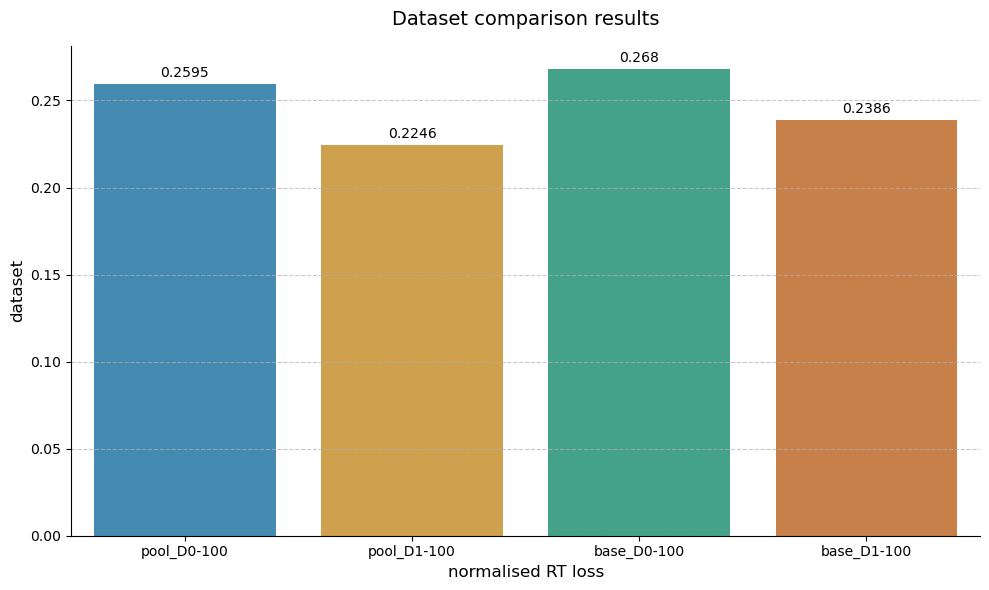

In [4]:
test_results_pool = get_standardised_loss("../lightning_logs","pool")
test_results_base = get_standardised_loss("../lightning_logs","base")
test_results = pd.concat([test_results_pool, test_results_base])
plot_bar_vertical(test_results,"Dataset comparison results","normalised RT loss","dataset",sort=False)

C:\Users\lambe\Documents\School\thesis\MTL-peptide-property-prediction_temp\src\plot.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


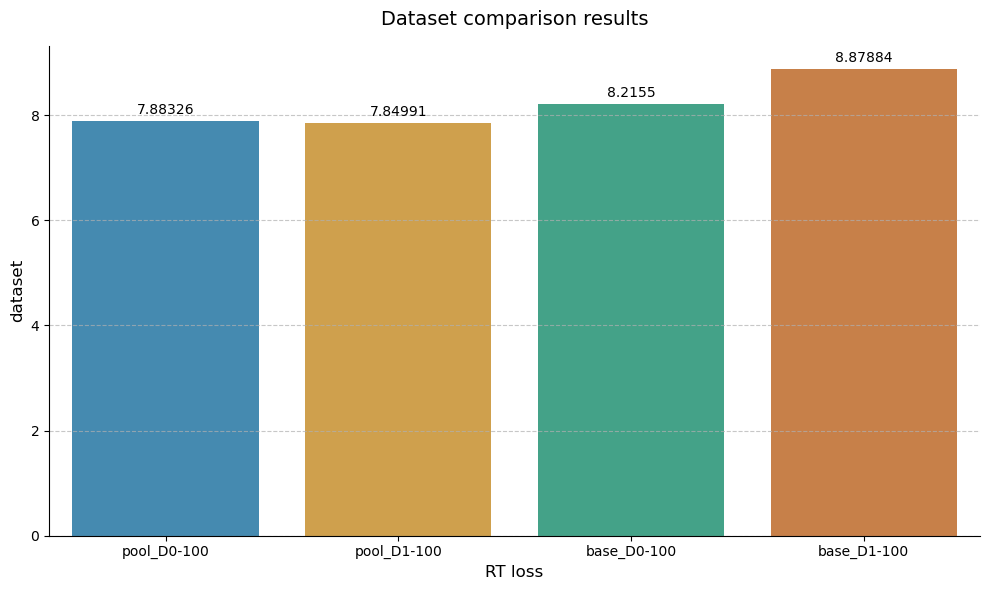

In [5]:
test_results_pool = get_loss("../lightning_logs","pool")
test_results_base = get_loss("../lightning_logs","base")
test_results = pd.concat([test_results_pool, test_results_base])
plot_bar_vertical(test_results,"Dataset comparison results","RT loss","dataset",sort=False)

# Increasing data

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np

In [15]:
loss = get_standardised_loss("../lightning_logs/increasing_data/","pool")

In [11]:
loss['MSV000080814']=0.2277

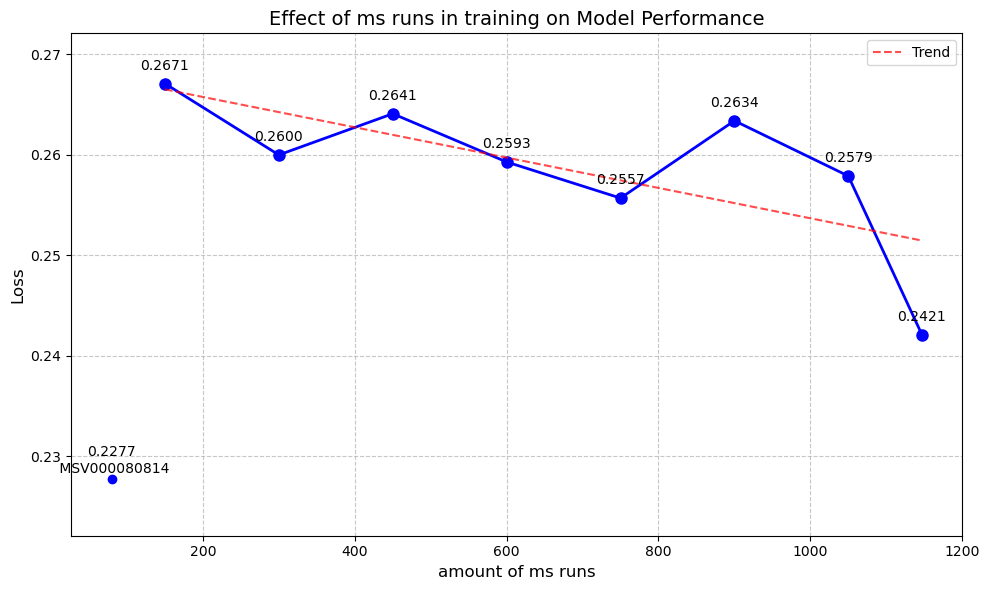

In [57]:
# Extract pool sizes from index and create a new series with numeric indices
pool_sizes = loss.index.map(lambda x: int(re.search(r'pool_(\d+)', x).group(1)))
sorted_indices = pool_sizes.argsort()

# Sort both the pool sizes and the values
sorted_sizes = pool_sizes[sorted_indices].values
sorted_values = loss.iloc[sorted_indices].values

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_sizes, sorted_values, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8)

# Add labels and title
plt.xlabel('amount of ms runs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Effect of ms runs in training on Model Performance', fontsize=14)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Customize y-axis limits to better show the variations
plt.ylim(min(sorted_values) - 0.02, max(sorted_values) + 0.005)

# Annotate each point with its value
for size, value in zip(sorted_sizes, sorted_values):
    plt.annotate(f'{value:.4f}', 
                 (size, value),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center')
# Coordinates for the point
x_special = 80  # or whatever x-value you want
y_special = 0.2277

# Plot the point
plt.plot(x_special, y_special, 'bo')  # 'ro' means red circle

# Annotate the point
plt.annotate('0.2277\n MSV000080814', 
             (x_special, y_special), 
             textcoords="offset points",
             xytext=(0, 5),
             ha='center',
             color='black',
             fontsize=10)
# Add trend line
z = np.polyfit(sorted_sizes, sorted_values, 1)
p = np.poly1d(z)
plt.plot(sorted_sizes, p(sorted_sizes), "r--", alpha=0.7, label=f'Trend')

plt.legend()
plt.tight_layout()

# Save the figure (optional)
# plt.savefig('pool_size_effect.png', dpi=300)

plt.show()